<a href="https://colab.research.google.com/github/rufaiaishat/Financial-Inclusion-Data/blob/main/Financial_Inclusion_Nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Financial Inclusion in Nigeria

####Exploratory Data Analysis

In [2]:
#Financial Inclusion in Nigeria
#import file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#import file from laptop
from google.colab import files
uploaded = files.upload()

Saving micro_nga.csv to micro_nga.csv


In [4]:
#read csv file into dataframe
df = pd.read_csv('micro_nga.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 120 entries, economy to merchantpay_dig
dtypes: float64(73), int64(45), object(2)
memory usage: 937.6+ KB


In [6]:
df.head()

,economy,economycode,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,Nigeria,NGA,182358305,0.812816,1,20.0,2,1,1,1,...,4,4,4,4,4,5,1,2,0,0
1,Nigeria,NGA,189983300,0.777928,2,50.0,2,4,1,2,...,1,4,4,4,1,1,1,1,1,0
2,Nigeria,NGA,134173456,1.338439,1,23.0,2,4,1,2,...,4,4,4,4,4,5,2,2,0,0
3,Nigeria,NGA,133272511,0.463378,2,27.0,2,5,1,2,...,1,4,4,4,2,1,1,1,1,1
4,Nigeria,NGA,195787893,2.649132,1,19.0,1,4,2,1,...,4,4,4,4,4,5,2,2,0,0


###**Exploratory Data Anaalysis - for People with no bank and mobile account**

In this section, we will explore the age,region, education level of individuals
without a bank or mobile account. Also, we will analyze their financial transactions, savings, credits habits, and payment receipts. We will assess their ability to access job opportunities and other economic opportunities.

In [8]:
#Analyse based on people who do not have an account
mask = df['account'] == 0
df_noaccount = df[mask]



In [11]:
df_noaccount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 2 to 997
Columns: 120 entries, economy to merchantpay_dig
dtypes: float64(73), int64(45), object(2)
memory usage: 360.2+ KB


In [20]:
#Check If people with no account have mobile account
df_noaccount['account_mob'].tail(10)

,account_mob
957,0
961,0
969,0
971,0
988,0
991,0
993,0
994,0
996,0
997,0


In [22]:
#group Age range of preople with no account using barchart
age_noact = df_noaccount['age']
age_noact.value_counts()
#group into age range

,count
age,
30.0,29
25.0,28
20.0,26
15.0,20
22.0,19
40.0,19
19.0,19
18.0,17
23.0,13


In [26]:
#Group the age of  people with no account into Age Range

# Define age group bins and labels using range format
bins = [15, 17, 24, 34, 44, 54, 64, 74, 84, float('inf')]
labels = ['15-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84','84+']

# Apply age group categorization
df_noaccount['age_group'] = pd.cut(df_noaccount['age'], bins=bins, labels=labels, right=True)

# Optional: View the count in each age group
print(df_noaccount['age_group'].value_counts().sort_index())


age_group
15-17     20
18-24    113
25-34    120
35-44     66
45-54     24
55-64      8
65-74      7
75-84      0
84+        2
Name: count, dtype: int64


<ipython-input-26-a5f4c281ef2c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noaccount['age_group'] = pd.cut(df_noaccount['age'], bins=bins, labels=labels, right=True)


In [32]:
#Count of Age Group with Mobile or Bank Account
age_noact = df_noaccount['age_group']
age_noact_vc = age_noact.value_counts()
age_noact_vc.head()

,count
age_group,
25-34,120
18-24,113
35-44,66
45-54,24
15-17,20


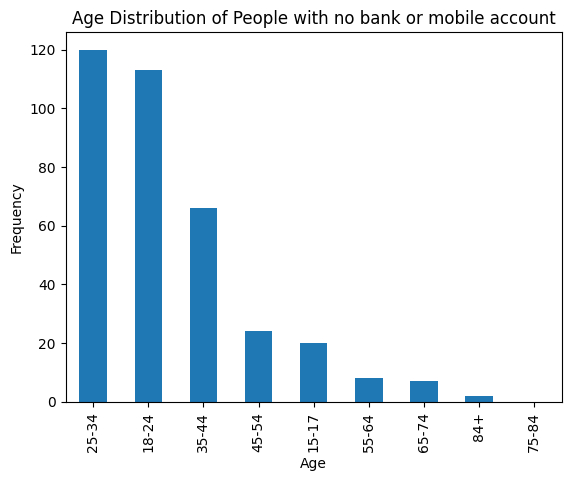

In [35]:
#Plot barchart for the age distribution of people with no Bank Account
age_noact_vc.plot(
    kind ="bar",
    xlabel="Age",
    ylabel="Frequency",
    title ="Age Distribution of People with no bank or mobile account",
);



In [39]:
#Group no account by region -urban/rural
df_noaccount['urbanicity_f2f'].value_counts()

,count
urbanicity_f2f,
2,202
1,179


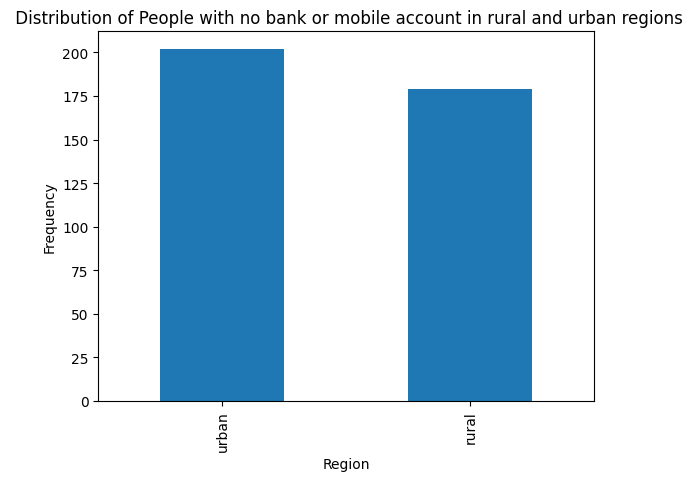

In [45]:
#Group no account by region -urban/rural
urban_dict = {
    1: "rural",
    2: "urban"
              }
urban_vc = df_noaccount['urbanicity_f2f'].replace(urban_dict).value_counts()
urban_vc.plot(
    kind ="bar",
    xlabel="Region",
    ylabel="Frequency",
    title =" Distribution of People with no bank or mobile account in rural and urban regions",
);

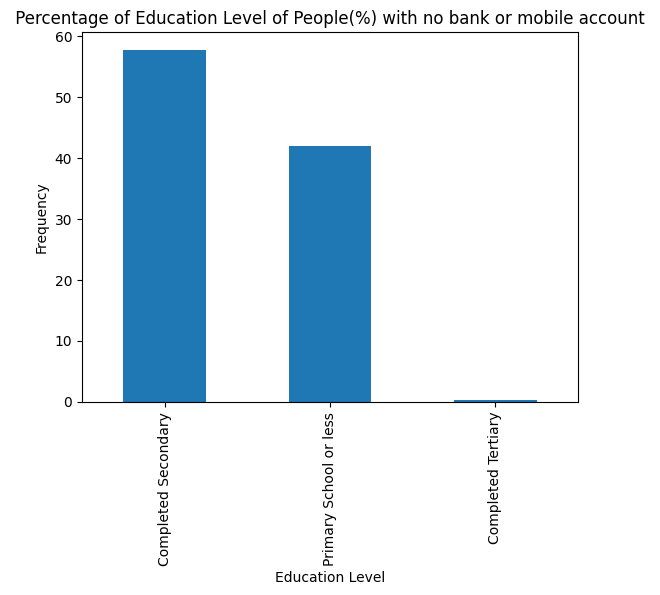

In [50]:
#Group no account by education
educ_dict = {
    1: "Primary School or less",
    2: "Completed Secondary",
    3: "Completed Tertiary"
              }
educ_vc = (df_noaccount['educ'].replace(educ_dict).value_counts(normalize=True))*100
educ_vc.plot(
    kind ="bar",
    xlabel="Education Level",
    ylabel="Frequency",
    title =" Percentage of Education Level of People(%) with no bank or mobile account ",
);

In [69]:
#Distribution of People with no bank account and their employment status

employed = {
    1: "in the workforce",
    2: "out of the workforce"
}
employed_vc= df_noaccount['emp_in'].replace(employed).value_counts()
employed_vc.head()


,count
emp_in,
in the workforce,261
out of the workforce,120


In [52]:
#Check if People with No Account receive agricultural payment
agrcpay_vc = {
    1: "Yes",
    2: "No",
    3: "Unknown"

}
agrcpay = df_noaccount['fin42'].replace(agrcpay_vc).value_counts()
agrcpay.head()

,count
fin42,
No,258
Yes,118
Unknown,5


In [54]:
#Check Percentage of People with No Account that are into agricultural business(either by growing crops or raising a livestock)
agrcbus = {
    1: "Yes",
    2: "No",
    3: "Both"

}
agrcbus_vc = df_noaccount['fin42a'].replace(agrcbus).value_counts()
agrcbus_vc.head()

,count
fin42a,
Yes,100
No,10
Both,8


In [57]:
#Distribution of People without account that saved within the past year
save = {
    1: "Yes",
    0: "No"
}
savings_vc= df_noaccount['saved'].replace(save).value_counts()
savings_vc.head()

,count
saved,
No,198
Yes,183


In [58]:
#Distribution of People without account that borrowed within the past year
borrow = {
    1: "Yes",
    0: "No"
}
borrow_vc= df_noaccount['borrowed'].replace(borrow).value_counts()
borrow_vc.head()

,count
borrowed,
No,200
Yes,181


In [60]:
#Distribution of People without account that receive wage payment
wage = {
    1: "receive payment into an Account",
    2: "receive payment in cash only",
    3: "receive payment using other methods",
    4: "did not recieve payment",
    5: "unknown"
}
wage_vc= df_noaccount['receive_wages'].replace(wage).value_counts()
wage_vc.head()

,count
receive_wages,
did not recieve payment,330
receive payment in cash only,47
receive payment using other methods,2
unknown,2


In [62]:
#Receive a Government transfer payment

govt_tfr = {
    1: "receive payment into an Account",
    2: "receive payment in cash only",
    3: "receive payment using other methods",
    4: "did not recieve payment",
    5: "unknown"
}
govt_tfr_vc= df_noaccount['receive_transfers'].replace(govt_tfr).value_counts()
govt_tfr_vc.head()


,count
receive_transfers,
did not recieve payment,369
unknown,5
receive payment in cash only,4
receive payment using other methods,3


In [63]:
#Received a government pension payment
govt_pen = {
    1: "receive payment into an Account",
    2: "receive payment in cash only",
    3: "receive payment using other methods",
    4: "did not recieve payment",
    5: "unknown"
}
govt_pen_vc= df_noaccount['receive_pension'].replace(govt_pen).value_counts()
govt_pen_vc.head()

,count
receive_pension,
did not recieve payment,377
unknown,3
receive payment using other methods,1


In [64]:
#Received a payment for the sale of agricultural goods
agric_pay = {
    1: "receive payment into an Account",
    2: "receive payment in cash only",
    3: "receive payment using other methods",
    4: "did not recieve payment",
    5: "unknown"
}
agric_pay_vc= df_noaccount['receive_agriculture'].replace(agric_pay).value_counts()
agric_pay_vc.head()

,count
receive_agriculture,
did not recieve payment,258
receive payment in cash only,114
unknown,5
receive payment using other methods,4


In [65]:
# Paid a utility bill

util_pay = {
    1: "made payment into an Account",
    2: "made payment in cash only",
    3: "made payment using other methods",
    4: "did not make payment",
    5: "unknown"
}
util_pay_vc= df_noaccount['pay_utilities'].replace(util_pay).value_counts()
util_pay_vc.head()

,count
pay_utilities,
did not make payment,308
made payment in cash only,62
made payment using other methods,6
unknown,5


In [67]:
 #Made or received a domestic remittance payment
 dom_pay = {
    1: "sent/received payment through an Account",
    2: "sent/received payment through an otc transaction",
    3: "sent/received payment in cash only",
    4: "sent/received payment using other methods",
    5: "did not send/receive",
    6: "unknown"
}
dom_pay_vc= df_noaccount['remittances'].replace(dom_pay).value_counts()
dom_pay_vc.head()



,count
remittances,
did not send/receive,246
sent/received payment in cash only,76
sent/received payment through an Account,35
unknown,9
sent/received payment using other methods,8


In [68]:
#Distribution of People with no bank account and their employment status

employed = {
    1: "in the workforce",
    2: "out of the workforce"
}
employed_vc= df_noaccount['emp_in'].replace(employed).value_counts()
employed_vc.head()


,count
emp_in,
in the workforce,261
out of the workforce,120


In [71]:
#check for availability of phone

mobile = {
    1: "yes",
    2: "no",
    3: "ref"
}
mobile_vc= df_noaccount['mobileowner'].replace(mobile).value_counts()
mobile_vc.head()



,count
mobileowner,
yes,253
no,128


In [72]:
#Distribution of People with internet access
internet = {
    1: "yes",
    2: "no",
    3: "unknown",
    4: "ref"
}
internet_vc= df_noaccount['internetaccess'].replace(internet).value_counts()
internet_vc.head()



,count
internetaccess,
no,317
yes,58
unknown,5
ref,1
